# Problem Definition
When competing in Kaggle competitions, there is varying importance of incorporating external data sources. I will follow the competition rules and then incorporate external data sources in a separate analysis to see what features are important and how crucial joining other data sets is for this type of problem.
https://www.kaggle.com/c/zillow-prize-1

In [2]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
% precision 2
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# Data
Zillow House Value competition - Los Angeles, Orange and Ventura, California) in 2016. 
Used for house value prediction in 6 time periods in the fall of 2017 tested against the actual sales volume for fall 2017
Data Dictionary: https://www.kaggle.com/c/zillow-prize-1/download/zillow_data_dictionary.xlsx.zip 
This data has the standard features you would expect:
Rooms, building type, age, amenities (pool/deck)
Interesting features: tax assessment for 2015, tax delinquency, and FIPS code
The FIPS or Zip code wil be the primary key for joining with census data or other granular demographic data that could be added for feature engineering

In [3]:
#data importing
data = pd.read_csv("../data/properties_2016.csv")
transactions_2016 = pd.read_csv("../data/train_2016_v2.csv")

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#joining 2016 transaction predictions from zillow
data_total = data.set_index('parcelid').join(transactions_2016.set_index('parcelid'))

In [5]:
#filtering based on later knowledge
data_total = data_total[(data_total.calculatedfinishedsquarefeet<10000) & (data_total.bathroomcnt > 0.0) & (data_total.bedroomcnt < 10.0) & (data_total.bathroomcnt < 10.0) & (data_total.structuretaxvaluedollarcnt < 2000000)]
#it may be possible to reduce some of these filters by taking the log of the square feet and price

In [6]:
data_total.head()

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
parcelid,,,,,,,,,,,,,,,,,,,,,
10711725,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,NaN,...,183000.0,615000.0,2015.0,432000.0,8625.75,NaN,NaN,6.037113e+13,NaN,NaN
10711726,1.0,NaN,NaN,3.0,5.0,NaN,4.0,3.0,NaN,NaN,...,217167.0,531642.0,2015.0,314475.0,6722.67,NaN,NaN,6.037113e+13,NaN,NaN
10711727,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,NaN,NaN,...,195295.0,328148.0,2015.0,132853.0,4160.63,NaN,NaN,6.037113e+13,NaN,NaN
10711728,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,NaN,...,188384.0,297377.0,2015.0,108993.0,3883.47,NaN,NaN,6.037113e+13,NaN,NaN
10711729,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,NaN,...,178238.0,297001.0,2015.0,118763.0,3884.27,NaN,NaN,6.037113e+13,NaN,NaN


# Data Dictionary for Base Data Set

Variable | Description
---| ---|
*airconditioningtypeid* |  Type of cooling system present in the home (if any)
*architecturalstyletypeid* |  Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
*basementsqft* |  Finished living area below or partially below ground level
*bathroomcnt* |  Number of bathrooms in home including fractional bathrooms
*bedroomcnt* |  Number of bedrooms in home 
*buildingqualitytypeid* |  Overall assessment of condition of the building from best (lowest) to worst (highest)
*buildingclasstypeid* | The building framing type (steel frame, wood frame, concrete/brick) 
*calculatedbathnbr* |  Number of bathrooms in home including fractional bathroom
*decktypeid* | Type of deck (if any) present on parcel
*threequarterbathnbr* |  Number of 3/4 bathrooms in house (shower + sink + toilet)
*finishedfloor1squarefeet* |  Size of the finished living area on the first (entry) floor of the home
*calculatedfinishedsquarefeet* |  Calculated total finished living area of the home 
*finishedsquarefeet6* | Base unfinished and finished area
*finishedsquarefeet12* | Finished living area
*finishedsquarefeet13* | Perimeter  living area
*finishedsquarefeet15* | Total area
*finishedsquarefeet50* |  Size of the finished living area on the first (entry) floor of the home
*fips* |  Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details
*fireplacecnt* |  Number of fireplaces in a home (if any)
*fireplaceflag* |  Is a fireplace present in this home 
*fullbathcnt* |  Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
*garagecarcnt* |  Total number of garages on the lot including an attached garage
*garagetotalsqft* |  Total number of square feet of all garages on lot including an attached garage
*hashottuborspa* |  Does the home have a hot tub or spa
*heatingorsystemtypeid* |  Type of home heating system
*latitude* |  Latitude of the middle of the parcel multiplied by 10e6
*longitude* |  Longitude of the middle of the parcel multiplied by 10e6
*lotsizesquarefeet* |  Area of the lot in square feet
*numberofstories* |  Number of stories or levels the home has
*parcelid* |  Unique identifier for parcels (lots) 
*poolcnt* |  Number of pools on the lot (if any)
*poolsizesum* |  Total square footage of all pools on property
*pooltypeid10* |  Spa or Hot Tub
*pooltypeid2* |  Pool with Spa/Hot Tub
*pooltypeid7* |  Pool without hot tub
*propertycountylandusecode* |  County land use code i.e. it's zoning at the county level
*propertylandusetypeid* |  Type of land use the property is zoned for
*propertyzoningdesc* |  Description of the allowed land uses (zoning) for that property
*rawcensustractandblock* |  Census tract and block ID combined - also contains blockgroup assignment by extension
*censustractandblock* |  Census tract and block ID combined - also contains blockgroup assignment by extension
*regionidcounty* | County in which the property is located
*regionidcity* |  City in which the property is located (if any)
*regionidzip* |  Zip code in which the property is located
*regionidneighborhood* | Neighborhood in which the property is located
*roomcnt* |  Total number of rooms in the principal residence
*storytypeid* |  Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details.
*typeconstructiontypeid* |  What type of construction material was used to construct the home
*unitcnt* |  Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
*yardbuildingsqft17* | Patio in  yard
*yardbuildingsqft26* | Storage shed/building in yard
*yearbuilt* |  The Year the principal residence was built 
*taxvaluedollarcnt* | The total tax assessed value of the parcel
*structuretaxvaluedollarcnt* | The assessed value of the built structure on the parcel
*landtaxvaluedollarcnt* | The assessed value of the land area of the parcel
*taxamount* | The total property tax assessed for that assessment year
*assessmentyear* | The year of the property tax assessment 
*taxdelinquencyflag* | Property taxes for this parcel are past due as of 2015
*logerror* | log error of what the zestimate estimated for this transaction that occurred in 2016
*transactiondata* | Date on which the transaction occurred (if there was one)

In [7]:
data_total.describe()
#very obvious due to the nature of some of these ids that some are discrete

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,804634.000000,6059.000000,1580.000000,2.845124e+06,2.845124e+06,18.000000,1.917193e+06,2.844341e+06,16821.0,201695.000000,...,2.841359e+06,658274.000000,2.845124e+06,2.845124e+06,2.845124e+06,2.845119e+06,2.843580e+06,54090.000000,2.834095e+06,88806.000000
mean,1.911233,7.202674,636.267089,2.285470e+00,3.200748e+00,3.944444,5.771411e+00,2.285429e+00,66.0,1375.534793,...,1.964137e+03,1.397219,1.636753e+05,4.065225e+05,2.015000e+03,2.428477e+05,5.224981e+03,13.886559,6.048012e+13,0.011495
std,3.115798,2.436690,489.025355,9.581241e-01,1.097406e+00,0.235702,1.800639e+00,9.580398e-01,0.0,610.122249,...,2.336396e+01,0.538826,1.564565e+05,4.348523e+05,1.801914e-02,3.258902e+05,5.358073e+03,2.143875,3.254466e+11,0.157125
min,1.000000,2.000000,20.000000,5.000000e-01,0.000000e+00,3.000000,1.000000e+00,1.000000e+00,66.0,3.000000,...,1.801000e+03,1.000000,1.000000e+00,1.000000e+01,2.009000e+03,4.000000e+00,1.638000e+01,0.000000,-1.000000e+00,-4.605000
25%,1.000000,7.000000,270.750000,2.000000e+00,3.000000e+00,4.000000,4.000000e+00,2.000000e+00,66.0,1012.000000,...,1.950000e+03,1.000000,7.604200e+04,1.842900e+05,2.015000e+03,7.521600e+04,2.534367e+03,14.000000,6.037312e+13,-0.025300
50%,1.000000,7.000000,533.000000,2.000000e+00,3.000000e+00,4.000000,7.000000e+00,2.000000e+00,66.0,1281.000000,...,1.963000e+03,1.000000,1.231685e+05,3.080000e+05,2.015000e+03,1.667580e+05,4.027760e+03,14.000000,6.037570e+13,0.006000
75%,1.000000,7.000000,840.000000,3.000000e+00,4.000000e+00,4.000000,7.000000e+00,3.000000e+00,66.0,1614.000000,...,1.981000e+03,2.000000,1.966160e+05,4.873250e+05,2.015000e+03,3.052835e+05,6.197702e+03,15.000000,6.059042e+13,0.038300
max,13.000000,27.000000,4122.000000,9.500000e+00,9.000000e+00,4.000000,1.200000e+01,9.500000e+00,66.0,8958.000000,...,2.015000e+03,41.000000,1.999424e+06,3.145769e+07,2.016000e+03,2.970788e+07,4.678122e+05,99.000000,4.830301e+14,4.737000


In [8]:
data_total.std()

airconditioningtypeid           3.115798e+00
architecturalstyletypeid        2.436690e+00
basementsqft                    4.890254e+02
bathroomcnt                     9.581241e-01
bedroomcnt                      1.097406e+00
buildingclasstypeid             2.357023e-01
buildingqualitytypeid           1.800639e+00
calculatedbathnbr               9.580398e-01
decktypeid                      0.000000e+00
finishedfloor1squarefeet        6.101222e+02
calculatedfinishedsquarefeet    8.635472e+02
finishedsquarefeet12            8.474904e+02
finishedsquarefeet13            1.263252e+02
finishedsquarefeet15            9.177705e+02
finishedsquarefeet50            6.392831e+02
finishedsquarefeet6             8.715674e+02
fips                            1.989931e+01
fireplacecnt                    4.537364e-01
fullbathcnt                     9.486066e-01
garagecarcnt                    5.533632e-01
garagetotalsqft                 2.367735e+02
hashottuborspa                  0.000000e+00
heatingors

In [9]:
data_total.var()

airconditioningtypeid           9.708196e+00
architecturalstyletypeid        5.937457e+00
basementsqft                    2.391458e+05
bathroomcnt                     9.180017e-01
bedroomcnt                      1.204301e+00
buildingclasstypeid             5.555556e-02
buildingqualitytypeid           3.242301e+00
calculatedbathnbr               9.178402e-01
decktypeid                      0.000000e+00
finishedfloor1squarefeet        3.722492e+05
calculatedfinishedsquarefeet    7.457138e+05
finishedsquarefeet12            7.182400e+05
finishedsquarefeet13            1.595806e+04
finishedsquarefeet15            8.423028e+05
finishedsquarefeet50            4.086829e+05
finishedsquarefeet6             7.596298e+05
fips                            3.959825e+02
fireplacecnt                    2.058768e-01
fullbathcnt                     8.998545e-01
garagecarcnt                    3.062108e-01
garagetotalsqft                 5.606168e+04
hashottuborspa                  0.000000e+00
heatingors

In [10]:
data_total.kurt()

airconditioningtypeid           8.472104e+00
architecturalstyletypeid        2.397502e+01
basementsqft                    4.913788e+00
bathroomcnt                     3.866187e+00
bedroomcnt                      2.607782e+00
buildingclasstypeid             1.800000e+01
buildingqualitytypeid           5.665176e-02
calculatedbathnbr               3.864789e+00
decktypeid                      0.000000e+00
finishedfloor1squarefeet        1.025856e+01
calculatedfinishedsquarefeet    7.035120e+00
finishedsquarefeet12            7.933782e+00
finishedsquarefeet13            3.161413e+00
finishedsquarefeet15            1.980910e+00
finishedsquarefeet50            1.680864e+01
finishedsquarefeet6             1.264471e+01
fips                            4.404846e+00
fireplacecnt                    1.223478e+01
fullbathcnt                     4.038197e+00
garagecarcnt                    2.582397e+01
garagetotalsqft                 6.088985e+00
hashottuborspa                  0.000000e+00
heatingors

In [11]:
data_total.skew()

airconditioningtypeid             3.216771
architecturalstyletypeid          4.212642
basementsqft                      1.687368
bathroomcnt                       1.269333
bedroomcnt                        0.852894
buildingclasstypeid              -4.242641
buildingqualitytypeid            -0.508894
calculatedbathnbr                 1.268956
decktypeid                        0.000000
finishedfloor1squarefeet          2.148465
calculatedfinishedsquarefeet      2.010700
finishedsquarefeet12              2.122162
finishedsquarefeet13             -1.069501
finishedsquarefeet15              1.228920
finishedsquarefeet50              2.658686
finishedsquarefeet6               2.929940
fips                              2.240718
fireplacecnt                      3.140826
fullbathcnt                       1.324902
garagecarcnt                      1.715274
garagetotalsqft                   0.181489
hashottuborspa                    0.000000
heatingorsystemtypeid             2.961852
latitude   

In [12]:
data_total.count()
#There are some variables that should be dropped since they are mostly NA:
##basementsqft, finishedsquarefeet13,typeconstructiontypeid, yardbuildingsqft26 are a few 

airconditioningtypeid            804634
architecturalstyletypeid           6059
basementsqft                       1580
bathroomcnt                     2845124
bedroomcnt                      2845124
buildingclasstypeid                  18
buildingqualitytypeid           1917193
calculatedbathnbr               2844341
decktypeid                        16821
finishedfloor1squarefeet         201695
calculatedfinishedsquarefeet    2845124
finishedsquarefeet12            2666680
finishedsquarefeet13                 12
finishedsquarefeet15             169496
finishedsquarefeet50             201695
finishedsquarefeet6                8939
fips                            2845124
fireplacecnt                     310662
fullbathcnt                     2844341
garagecarcnt                     870629
garagetotalsqft                  870629
hashottuborspa                    68187
heatingorsystemtypeid           1798451
latitude                        2845124
longitude                       2845124


In [13]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845124 entries, 10711725 to 163275886
Data columns (total 59 columns):
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                  object

In [14]:
data_dropped = data_total.dropna()

In [15]:
data_dropped.info()
#if we did a dropna...we would have no data left so this will be a challenge in weighing what to keep...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 59 columns):
airconditioningtypeid           0 non-null float64
architecturalstyletypeid        0 non-null float64
basementsqft                    0 non-null float64
bathroomcnt                     0 non-null float64
bedroomcnt                      0 non-null float64
buildingclasstypeid             0 non-null float64
buildingqualitytypeid           0 non-null float64
calculatedbathnbr               0 non-null float64
decktypeid                      0 non-null float64
finishedfloor1squarefeet        0 non-null float64
calculatedfinishedsquarefeet    0 non-null float64
finishedsquarefeet12            0 non-null float64
finishedsquarefeet13            0 non-null float64
finishedsquarefeet15            0 non-null float64
finishedsquarefeet50            0 non-null float64
finishedsquarefeet6             0 non-null float64
fips                            0 non-null float64
fireplacecnt                    0 non-nu

In [16]:
count_rows = len(data_total)
count_rowsnotnan = data_total.count()
data_percentempty = (count_rows - count_rowsnotnan)/count_rows

In [17]:
per50cut = data_percentempty[data_percentempty>.5]

In [18]:
per50cut = per50cut.to_frame()

In [19]:
per50cut = per50cut.T

In [20]:
new_header = per50cut.iloc[0] #grab the first row for the header
header = per50cut[1:] #take the data less the header row
per50cut.columns = new_header #set the header row as the df header

In [1]:
per50cut

NameError: name 'per50cut' is not defined

In [47]:
names = per50cut.columns.values

In [48]:
data_50 = data_total[np.intersect1d(data_total.columns, names)]

In [49]:
data_50.head()
#this obviously didn't go as planned since the names df when printed is a list of percentages and not column names
#can use dropna parameters instead of engineers --
#DF - not null to get % not missing. sum / len(df) gets %
#limit parameter in dropna (len df * x)
#how - all/not
#

""
parcelid
10711725
10711726
10711727
10711728
10711729


# Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e8617d0>]], dtype=object)

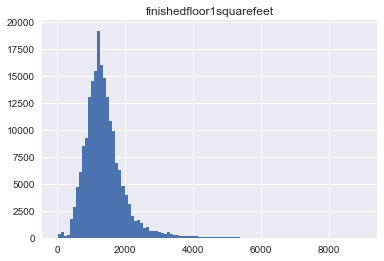

In [50]:
%matplotlib inline
data_total.hist('finishedfloor1squarefeet',bins=100)
#most units hover around 1800 in sqft with some outliers above 4000

count    2.845124e+06
mean     2.285470e+00
std      9.581241e-01
min      5.000000e-01
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      9.500000e+00
Name: bathroomcnt, dtype: float64

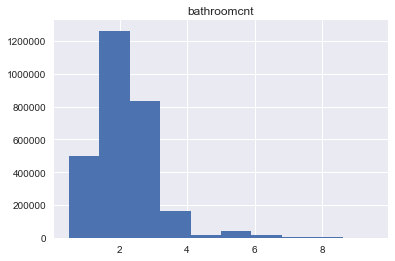

In [51]:
%matplotlib inline
data_total.hist('bathroomcnt',bins=10)
#2 bath units are by far the most common
data_total.bathroomcnt.describe()

count    2.845124e+06
mean     3.200748e+00
std      1.097406e+00
min      0.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      9.000000e+00
Name: bedroomcnt, dtype: float64

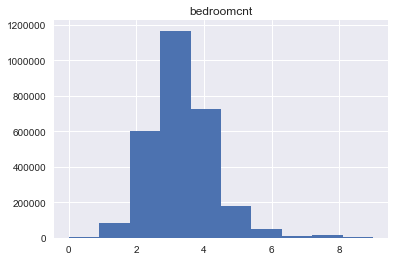

In [52]:
%matplotlib inline
data_total.hist('bedroomcnt',bins=10)
data_total.bedroomcnt.describe()

count    2.845124e+06
mean     1.784660e+03
std      8.635472e+02
min      1.000000e+00
25%      1.214000e+03
50%      1.572000e+03
75%      2.122000e+03
max      9.996000e+03
Name: calculatedfinishedsquarefeet, dtype: float64

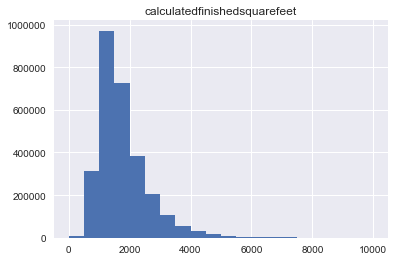

In [53]:
%matplotlib inline
data_total.hist('calculatedfinishedsquarefeet',bins=20)
data_total.calculatedfinishedsquarefeet.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e5d3a50>]], dtype=object)

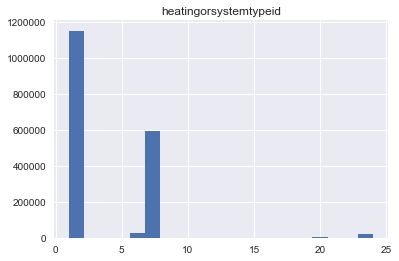

In [54]:
%matplotlib inline
data_total.hist('heatingorsystemtypeid',bins=20)

count    2.845124e+06
mean     1.636753e+05
std      1.564565e+05
min      1.000000e+00
25%      7.604200e+04
50%      1.231685e+05
75%      1.966160e+05
max      1.999424e+06
Name: structuretaxvaluedollarcnt, dtype: float64

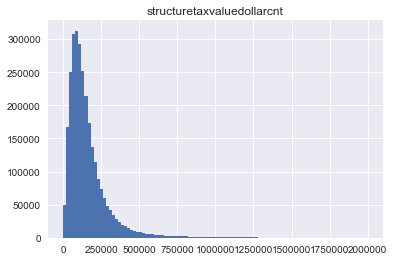

In [55]:
%matplotlib inline
data_total.hist('structuretaxvaluedollarcnt',bins=100)
data_total.structuretaxvaluedollarcnt.describe()

In [56]:
#g = sns.FacetGrid(data_total, col='regionidzip', col_wrap=6, hue='regionidzip')
#g.map(sns.barplot, 'architecturalstyletypeid', 'taxvaluedollarcnt');
#this was a silly plot

In [57]:
pd.crosstab(index=data_total["bathroomcnt"],columns=data_total["bedroomcnt"])
#we have a pretty good idea that 1,2,3 bedrooms are the most common

bedroomcnt,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
bathroomcnt,,,,,,,,,,
0.50,2,7,5,3,0,0,0,0,0,0
1.00,4720,72586,244278,165023,9796,1196,177,31,9,1
1.50,5,1871,15711,23480,4524,242,28,3,1,1
1.75,0,0,1,2,2,0,0,0,0,0
2.00,775,10441,255671,633907,287988,24596,3604,374,106,21
2.50,22,307,27265,102269,69983,6489,440,31,1,1
3.00,125,795,58543,215077,261870,74513,14400,2655,494,160
3.50,6,9,537,7872,15926,5672,630,73,13,3
4.00,195,88,1620,16411,52267,31847,15473,4227,8162,674


In [58]:
pd.pivot_table(data_total, values='structuretaxvaluedollarcnt', index=['bathroomcnt'], columns=['bedroomcnt'],aggfunc=np.mean,margins=True)
#it looks like there are some obvious data cleaning issues -- there is a house with 20 bedrooms and 0 bathrooms (and some with 0 bedrooms and 20 bathrooms)

bedroomcnt,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
bathroomcnt,,,,,,,,,,,
0.5,4.759585e+05,152250.285714,1.142654e+05,72047.333333,NaN,NaN,NaN,NaN,NaN,NaN,1.650081e+05
1.0,1.024471e+05,81410.796503,6.779696e+04,73539.037874,8.389735e+04,9.411710e+04,1.018556e+05,1.137316e+05,1.184814e+05,138321.000000,7.241005e+04
1.5,1.547996e+05,125140.299840,8.254815e+04,73699.620187,8.404539e+04,9.256562e+04,6.747739e+04,8.887667e+04,3.405200e+04,938541.000000,7.997304e+04
1.75,NaN,NaN,9.880300e+04,133511.000000,1.437525e+05,NaN,NaN,NaN,NaN,NaN,1.306660e+05
2.0,2.181532e+05,158595.655589,1.269752e+05,114308.915021,1.181159e+05,1.248279e+05,1.362168e+05,1.302091e+05,1.522501e+05,147252.190476,1.186014e+05
2.5,2.000774e+05,205909.648208,1.591098e+05,189017.558136,1.942897e+05,1.724888e+05,1.674442e+05,1.370836e+05,1.391870e+05,218688.000000,1.863125e+05
3.0,1.961545e+05,239535.349686,2.059035e+05,207323.594806,2.229732e+05,2.167402e+05,1.797437e+05,1.732668e+05,1.784133e+05,170196.025000,2.140574e+05
3.5,4.186317e+05,401777.222222,3.744028e+05,394434.819995,3.962329e+05,3.285656e+05,2.560664e+05,2.305314e+05,1.817562e+05,224071.333333,3.795384e+05
4.0,1.470101e+05,318967.670455,3.543621e+05,388284.527025,3.492382e+05,3.413337e+05,2.456589e+05,2.121448e+05,2.029280e+05,212906.078635,3.254684e+05


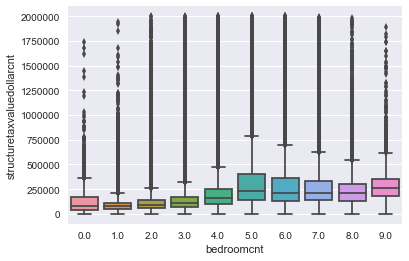

In [59]:
sns.boxplot(x='bedroomcnt',y='structuretaxvaluedollarcnt',data=data_total)
sns.despine()
#it looks like there is a significant move in the average value once 5 beds are hit -- could be something to create a feature out of
#it also looks like there is a high IQR for 0 bedroom units - may be location based -- could be something to create a location out of based on geo...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110fd8b90>]], dtype=object)

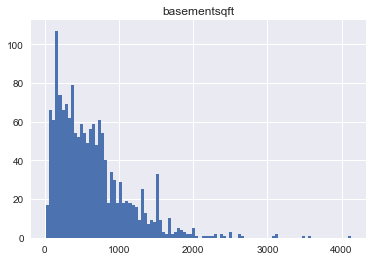

In [60]:
%matplotlib inline
data_total.hist('basementsqft',bins=100)
#positively skewed with a large portion of houses having basements under 1000 sqft

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f1e1910>]], dtype=object)

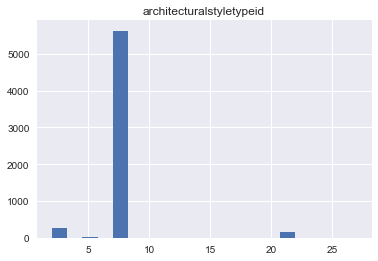

In [61]:
%matplotlib inline
data_total.hist('architecturalstyletypeid',bins=20)
#A severe majority of architectual styles are type 8

In [10]:
cols = ['bedroomcnt', 'bathroomcnt', 'basementsqft', 'structuretaxvaluedollarcnt','finishedfloor1squarefeet']
#should have done this instead of the filtering method above (that didn't work)

In [ ]:
#sns.pairplot(data_total[cols]);
#not sure why this didn't work

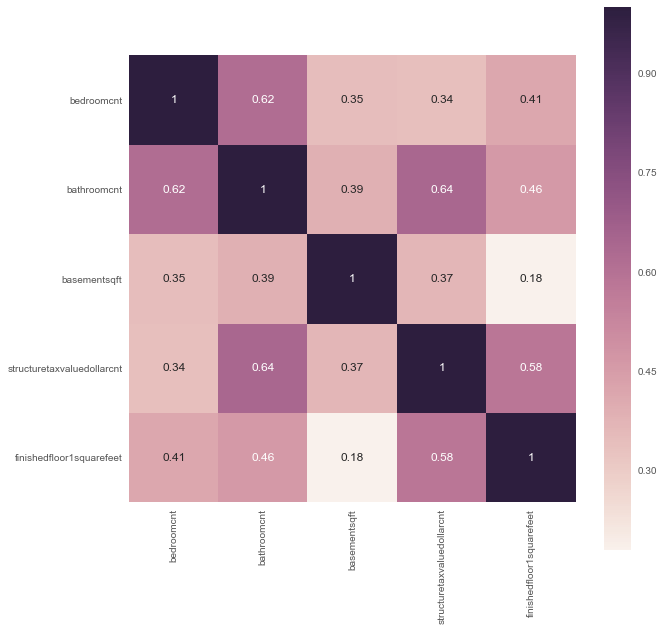

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(data_total[cols].corr(), square=True, annot=True, annot_kws={'size': 12});
#surprisingly, there is very little correlation between first floor size and basement size
#bathrooms and bedroom counts have the strongest impact on the value of the parcel - unsurprising
#there doesn't seem to be any serious correlation between the what are the most important variables

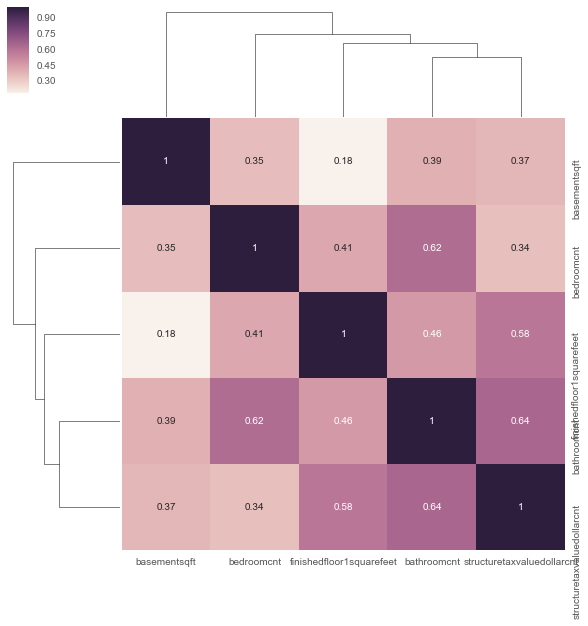

In [74]:
sns.clustermap(data_total[cols].corr(), annot=True,annot_kws={'size': 10});

## Data Dict for Architectural ID

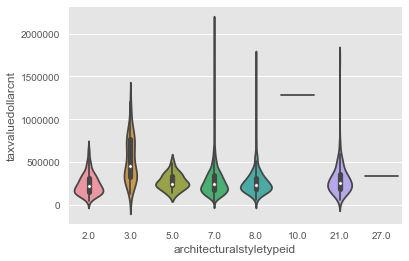

In [6]:
% matplotlib inline
sns.violinplot(x='architecturalstyletypeid', y='taxvaluedollarcnt', data=data_total)
#cape cod style houses seem to have a wide range of values and are bidmodal

Variable | Description
---| ---| 
*1* | A-Frame
*2* | Bungalow
*3* | Cape Cod
*4* | Cottage
*5* | Colonial
*6* | Custom
*7* | Contemporary
*8* | Conventional
*9* | Dome
*10* | French Provincial
*11* | Georgian
*12* | High Rise
*13* | Historical
*14* | Log Cabin/Rustic
*15* | Mediterranean
*16* | Modern
*17* | Mansion
*18* | English
*19* | Other
*20* | Prefab
*21* | Ranch/Rambler
*22* | Raised Ranch
*23* | Spanish
*24* | Traditional
*25* | Tudor
*26* | Unfinished/Under Construction
*27* | Victorian

In [ ]:
#sns.lmplot(x="finishedsquarefeet12", y="structuretaxvaluedollarcnt", data=data_total,robust=True);
#commenting this since the first lmplot didn't finish after 20 mins

In [ ]:
#sns.lmplot(x="bedroomcnt", y="structuretaxvaluedollarcnt", data=data_total,robust=True);
#commenting this since the first lmplot didn't finish after 20 mins

In [ ]:
#sns.lmplot(x="roomcnt", y="structuretaxvaluedollarcnt", data=data_total,robust=True);
#commenting this since the first lmplot didn't finish after 20 mins

In [ ]:
#sns.lmplot(x="heatingorsystemtypeid", y="structuretaxvaluedollarcnt", data=data_total,robust=True);
#commenting this since the first lmplot didn't finish after 20 mins

In [ ]:
#sns.lmplot(x="bedroomcnt", y="roomcnt", data=data_total,robust=True);
#commenting this since the first lmplot didn't finish after 20 mins

In [ ]:
#sns.lmplot(x="bathroomcnt", y="roomcnt", data=data_total,robust=True);
#commenting this since the first lmplot didn't finish after 20 mins

In [ ]:
#sns.lmplot(x="bedroomcnt", y="calculatedfinishedsquarefeet", data=data_total,robust=True);
#commenting this since the first lmplot didn't finish after 20 mins

In [ ]:
#sns.lmplot(x="bathroomcnt", y="calculatedfinishedsquarefeet", data=data_total,robust=True);
#commenting this since the first lmplot didn't finish after 20 mins

In [ ]:
#sns.swarmplot(x="bathroomcnt", y="bedroomcnt", data=data_total);
#commenting this out since it is way too many points to plot with a swarm plot

In [17]:
pd.pivot_table(data_total, values='structuretaxvaluedollarcnt', index=['bedroomcnt'], columns=['unitcnt'],aggfunc=np.mean,margins=True)
#it looks like there are some obvious data cleaning issues -- there is a house with 20 bedrooms and 0 bathrooms (and some with 0 bedrooms and 20 bathrooms)

unitcnt,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,32.0,39.0,70.0,80.0,111.0,143.0,206.0,303.0,502.0,All
bedroomcnt,,,,,,,,,,,,,,,,,,,,,
0.0,116947.633906,90568.426230,102294.764706,141022.216080,NaN,168906.000000,556806.000000,159097.000000,294130.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116584.617465
1.0,97574.435557,86742.442283,107391.987952,134742.186813,98598.666667,NaN,123984.000000,NaN,NaN,82834.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97532.701361
2.0,111728.423335,88854.000232,113115.395833,147063.655738,168191.125000,535746.333333,346300.000000,232720.000000,63937.000000,137174.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18943.0,NaN,111106.588850
3.0,135534.034876,104761.415169,116609.426073,155830.726087,144581.800000,405968.000000,280550.500000,65094.000000,NaN,132474.000000,...,NaN,NaN,127497.0,NaN,NaN,NaN,NaN,NaN,NaN,134611.589178
4.0,209584.227109,124661.971422,125216.025591,146981.645101,288449.230769,172219.300000,245946.000000,NaN,NaN,179392.333333,...,58726.0,205401.0,NaN,184858.0,248076.0,243856.0,NaN,NaN,77294.0,199652.089303
5.0,357854.150311,151433.072328,144098.083902,160152.977038,174502.607843,224634.000000,226883.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311379.561719
6.0,471138.956087,200767.002242,165465.610148,189124.870585,172955.790698,177409.580645,163935.000000,NaN,146826.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,45874.0,NaN,NaN,301929.874130
7.0,541644.267446,231742.607834,193339.755118,199368.976807,210961.714286,221867.111111,224008.285714,233389.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297783.759691
8.0,584145.995276,256847.063492,223861.621036,220096.704589,216475.344828,233147.450000,194313.333333,259703.714286,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242861.546951


In [18]:
pd.pivot_table(data_total, values='structuretaxvaluedollarcnt', index=['bathroomcnt'], columns=['unitcnt'],aggfunc=np.mean,margins=True)
#it looks like there are some obvious data cleaning issues -- there is a house with 20 bedrooms and 0 bathrooms (and some with 0 bedrooms and 20 bathrooms)

unitcnt,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,32.0,39.0,70.0,80.0,111.0,143.0,206.0,303.0,502.0,All
bathroomcnt,,,,,,,,,,,,,,,,,,,,,
1.0,7.301806e+04,93928.681095,120167.828473,170938.683962,299133.500000,NaN,NaN,NaN,NaN,107146.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18943.0,NaN,73249.888768
1.5,7.524775e+04,136466.545455,190438.555556,371627.800000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163261.295775
1.75,NaN,NaN,88847.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88847.000000
2.0,1.232312e+05,104374.748021,112183.289855,153029.017857,115732.500000,287101.750000,118590.000000,65094.000000,NaN,131452.666667,...,58726.0,NaN,127497.0,NaN,NaN,NaN,NaN,NaN,77294.0,121773.748958
2.5,1.574233e+05,314372.487805,206504.666667,248307.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231492.557895
3.0,2.165682e+05,146078.700176,129494.701125,146603.762195,122709.555556,174391.500000,258309.000000,NaN,220478.0,225629.500000,...,NaN,205401.0,NaN,184858.0,248076.0,243856.0,NaN,NaN,NaN,209333.847893
3.5,3.594594e+05,540907.261905,313274.000000,NaN,NaN,765595.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,484671.936508
4.0,3.902867e+05,209313.821483,169799.844705,170432.555713,173258.000000,202993.875000,226961.250000,NaN,NaN,82834.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,45874.0,NaN,NaN,318110.611904
4.5,4.410539e+05,585644.000000,787510.500000,258295.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546582.090909


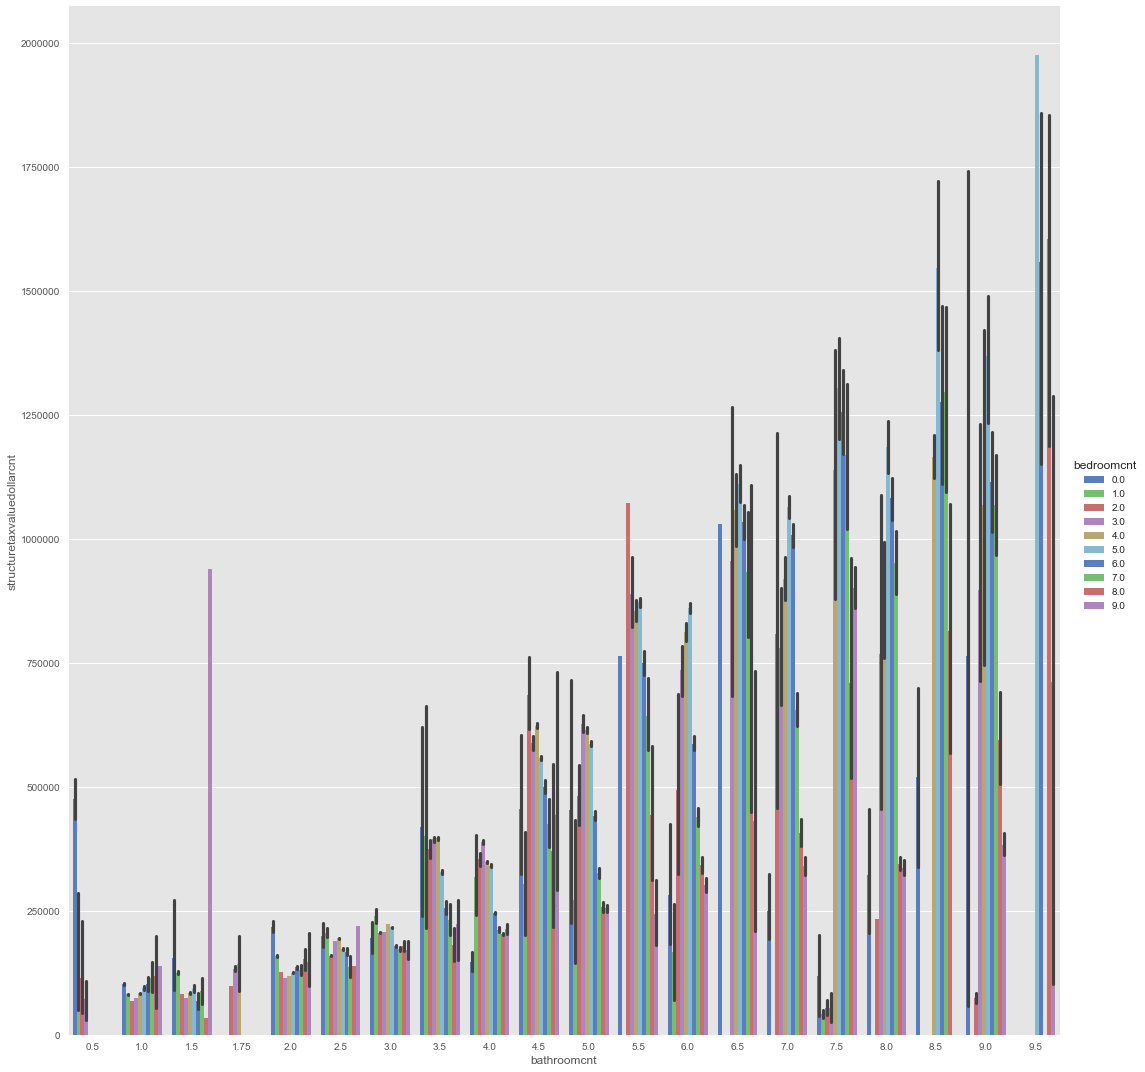

In [16]:
%matplotlib inline
sns.factorplot(x="bathroomcnt", y="structuretaxvaluedollarcnt", hue="bedroomcnt", data=data_total, kind="bar",size=15, palette="muted")
#it looks like there isn't a premium to having higher number of bathrooms

In [ ]:
#commenting out since this didn't work for some reason
#sns.pairplot(data_total[cols])

# Hypothesis Notes

- Unsurprisingly, what one thought would be the most important house features are those that are missing the least
    - This makes using some of the more sparse and interesting features of the data set difficult to use as most of the values are missing (and could cause odd weighting when they are not missing)
- There are a lot of potential data sets to join on from demographic data since this data has rich geographic keys
- I will join some census demographic data as well as the property taxes (as these may have a material impact and could be useful for feature engineering)
    - This could be visualized on a few plots by showing a floor or ceiling where tax rates may have an impact (in creating or enforcing)
- There are a lot features that are IDs in this data set, it will be important to play around with which are kept or dummified
- It will be tricky using the log errors from the zestimate predictions but this joined data set will be useful for predicting over time
    - For example, would one filter the input data set to be only those that were sold in the last year? Or filter to those not sold in the last year? 
- Possible engineered feature additions:
    - Unit sold in last year?
    - How many units is this parcel within?
    - Can we use geographic proximity to increase the knowledge incorporated by the zip (ie. suburbs, city, rural even though this is Orange County)
    - High/low tax area?
    -  How does the finished living area compare to the total area? Will increases or decreases in this ratio have an impact on value?
    - Are there interesting trends in house value and architectural type that could be put into classes?
-  I also expect that taking the log of the house price will reduce the impact of outliers on this data, thus removing the need of some of the initial filtering done in the import stage of the data set
 -  Since we have the log error, one could try to reverse engineer what the predicted value was from Zillow (using the structuretaxvaluedollarcnt as a signal in 2016 since this was the last time of assessment for property sold in 2016)